# Multidimensional Data (`xarray`)

> This page is a Jupyter Notebook that can be [found and downloaded at the GitHub repository](https://github.com/trchudley/geospatial-python-durham/blob/main/website/02_using/03b_nd_data.ipynb).

## What is multidimensional data?

Managing more complex data is, of course, slightly more challenging. 

You might expect me to jump into 2-D raster data at this point, but we are in fact going to jump into "n-dimensional" climate data (the _why_ will become apparent soon). By n-dimensional, we mean the data can have as many dimensions as we like. Think of a, say, an ERA-5 dataset of atmospheric reanalysis: this gridded dataset will have an `x`, `y`, and `z` dimension, but may also have a `time` dimension, before we even get to the parameters (pressure, temperature, etc).

If you've encountered them before, it's probably been in a format such as netCDF (`.nc`) or HDF (`.hdf`, `.h5`, etc).

![n-dimensional dataset, from https://tutorial.xarray.dev/overview/xarray-in-45-min.html](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

The community-standard package we use to manage these datasets is called `xarray` ([quickstart tutorial here](https://tutorial.xarray.dev/intro.html)). 

## `xarray` Datasets

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

It hopefully will seem somewhat familiar from the python interface above, with similar patterns of data structure and indexing. Now, rather than talking above `DataFrames`, we can talk about `DataArrays` and `Datasets`.

The standard file format you will likely be familiar with for these datasets is the NetCDF (`.nc`) file, but there also exist the HDF5 (`.hdf`, `.h5`) and Zarr (`.zarr`) formats. 

Either way, you can throw whatever you want at the `xr.open_dataset()` function and it will probably work:

```python
xds = xr.open_dataset("my_dataset.nc")
```

However, as I don't have a handy one to hand, we're going to use one of the `xarray` tutorial datasets, some NCEP air temperature records:

In [2]:
xds = xr.tutorial.load_dataset("air_temperature")
xds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Have a good look at the visualisation above and try and digest what's going on. 

## Indexing Datasets

We can still visualise this, but it's slightly more complicated. Note that we have our coordinates indices: `lat`, `lon`, and `time`. We also have our `air` variable, which has data along all three coordinates. (Individual variables don't need to use every coordinate - imagine there was also an `elevation` variable, which just used `lat` and `lon` but not `time`).

We can't plot all of this at once, but we can take slices of the dataset to get an idea of what's happening. For instance, we could pick a single instance in time:

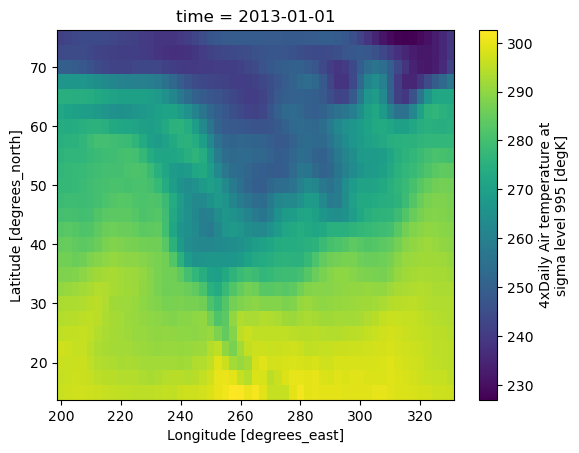

In [3]:

# Take the 0th index along the time axis, and plot the `air` variable using
# matplotlibs `imshow` in the backend:
xds.isel(time=0).air.plot.imshow()
plt.show()

OK, it's clearer now: this is a temperature record of North America. 

We could, however, try and view this along the `time` axis. We could choose random indices using `isel` again, or do something a bit more complex by selecting the pixel closest to a given geographic location:

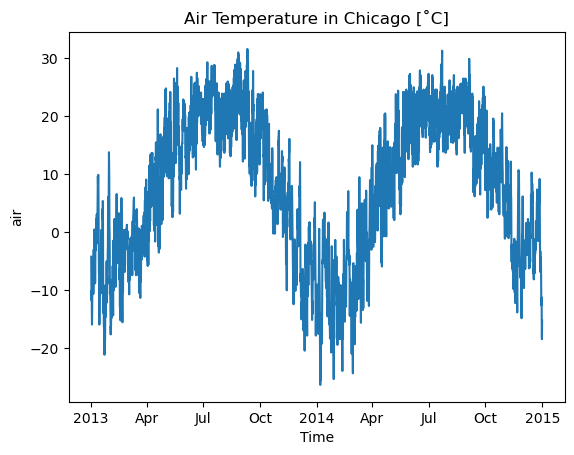

In [4]:
chicago_lat = 41.8781
chicago_lon = -87.6298 + 360 # data is in positive degrees east, so add 360

# Select nearest grid cell to Chicago
ts_chicago = xds['air'].sel(lat=chicago_lat, lon=chicago_lon, method="nearest")

# ts_chicago is now a DataArray indexed by time, but we could also get a
# pandas dataframe if we wanted using `to_pandas()`

# Air temperature is in Kelvin, so let's convert to Celsius
ts_chicago = ts_chicago - 273.15

# Now let's plot it!

fig, ax = plt.subplots()
ts_chicago.plot(ax=ax)
ax.set_title('Air Temperature in Chicago [˚C]')
plt.show()

## Manipulating Data

We can go further - what if we wanted the mean July air temperature for the whole of the dataset?

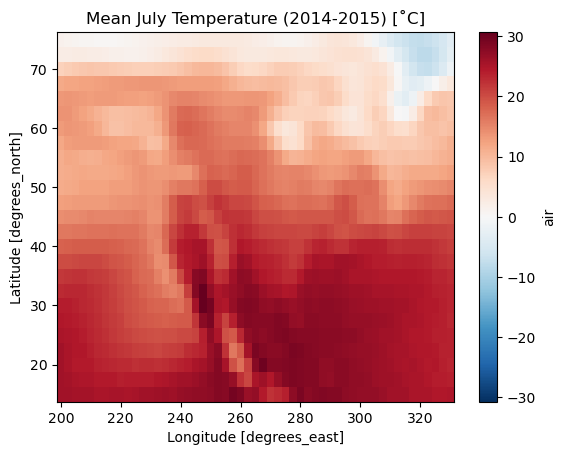

In [5]:
# Get mean July temperature for xds
mean_july = xds['air'].sel(time=xds['time'].dt.month == 7).mean(dim='time')

# Convert to Celsius
mean_july = mean_july - 273.15

# Plot
fig, ax = plt.subplots()
mean_july.plot.imshow(ax=ax)
ax.set_title('Mean July Temperature (2014-2015) [˚C]')
plt.show()

Hopefully this begins to show the strength of how we can use `xarray` to assess n-dimensional climate datasets.